In [16]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import xarray as xr
from myTrend import myfitting2d_sttcs,myfitting1d_sttcs
from myPlot import  figmaster,myClrbr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pthMO='J:/MDLS_OBS_OHC/'

wpth='C:/Users/shjo/OneDrive/mySO/trend_ohc/'
t_rng=[1980, 2020]

### Preparation ============================================================

myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]

myDATA=myMDOB


ImportError: cannot import name 'myfitting1d_sttcs' from 'myTrend' (C:\Users/shjo/Bridge/JNUpack/SO/libs\myTrend.py)

In [10]:
lat_rng=[-80,-30] ; time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']
i = myDATA[-1]
print('!!! Open: '+i+' !!!')
tmp=xr.open_dataset(i)

mySST = tmp.OHC7002000.loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
    ,time=slice(time_rng[0],time_rng[-1]))]
mySST=mySST.where(mySST<10**30)
mySST=mySST.mean(dim='lon',skipna=True)



!!! Open: J:/MDLS_OBS_OHC/myISHII_198001_201912_tsh.nc !!!


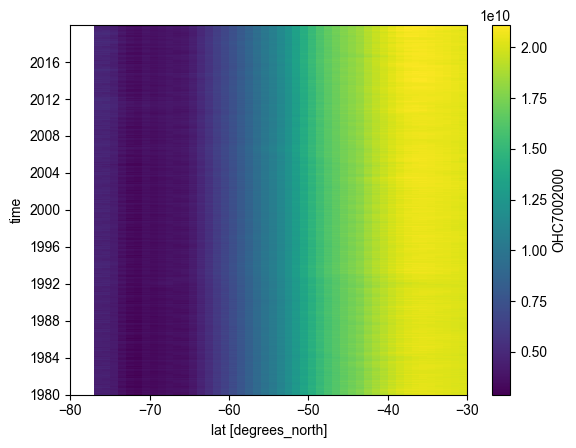

In [12]:
mySST.plot()

In [13]:

time=mySST.time.values
latR=mySST.lat.values
tR_m,latR_m=np.meshgrid(time,latR)
dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' OHC700 '+'trend '+\
    str(time[0])[:4]+' '+str(time[-1])[:4]


In [14]:
### SST Coef =============================================================
print('!!! linregress !!!')
slope,intercept,r_value,p_value,std_err,smask=myfitting2d_sttcs(mySST,threshold=0.05)
CoefD=slope*12*10**-8 # Decadal^-1

!!! linregress !!!


ValueError: not enough values to unpack (expected 3, got 2)